In [6]:
from google.colab import files
upload= files.upload()

Saving dog.jpg to dog.jpg


In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2


# Load image from file
img_path = '/content/dog.jpg'  # <-- Change this path to your image file
img = image.load_img(img_path, target_size=(224, 224))  # Resize as needed
img_array = image.img_to_array(img)  # Convert to array
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

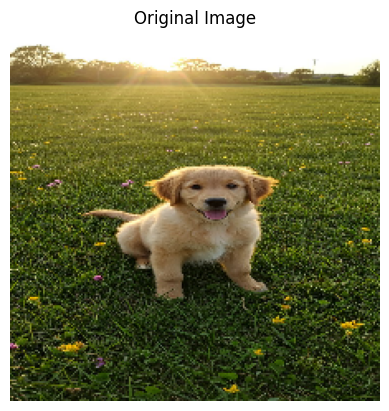

In [37]:
# Display the original image
plt.imshow(img_array[0].numpy().astype("uint8"))  # Select the first image from the batch
plt.title("Original Image")
plt.axis("off")
plt.show()

In [38]:
def show_image(img, title="Image"):
    if isinstance(img, tf.Tensor):
        img = img.numpy()
    img = np.clip(img, 0, 255).astype("uint8")
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

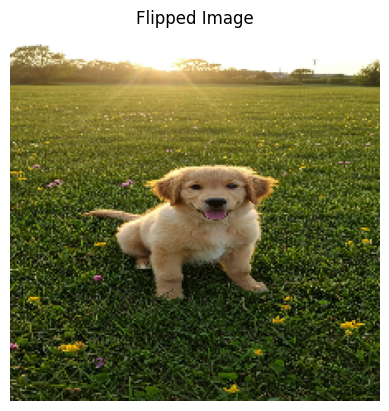

In [39]:
# 1. Random Flip
flip_layer = tf.keras.layers.RandomFlip("horizontal_and_vertical")
flipped_img = flip_layer(img_array)[0]
show_image(flipped_img, "Flipped Image")

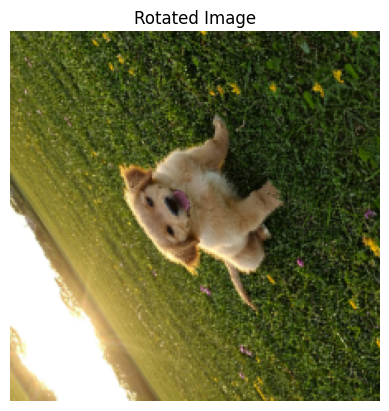

In [40]:
# 2. Random Rotation
rotate_layer = tf.keras.layers.RandomRotation(0.8)
rotated_img = rotate_layer(img_array)[0]
show_image(rotated_img, "Rotated Image")

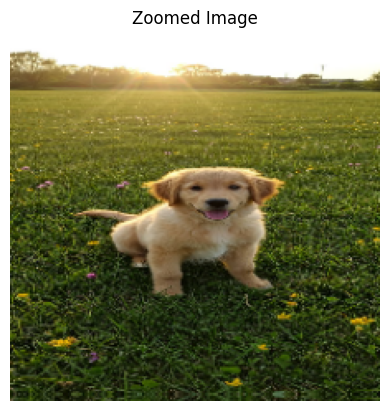

In [16]:
# 3. Random Zoom
zoom_layer = tf.keras.layers.RandomZoom(0.1, 0.2)
zoomed_img = zoom_layer(img_array)[0]
show_image(zoomed_img, "Zoomed Image")

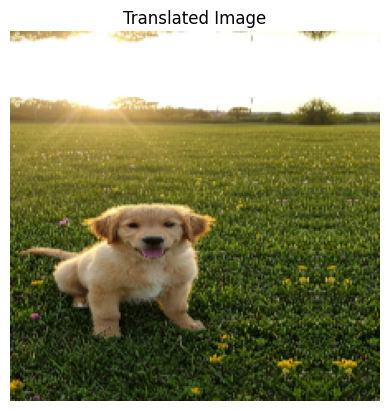

In [18]:
# 4. Random Translation
translate_layer = tf.keras.layers.RandomTranslation(0.2, 0.2)
translated_img = translate_layer(img_array)[0]
show_image(translated_img, "Translated Image")


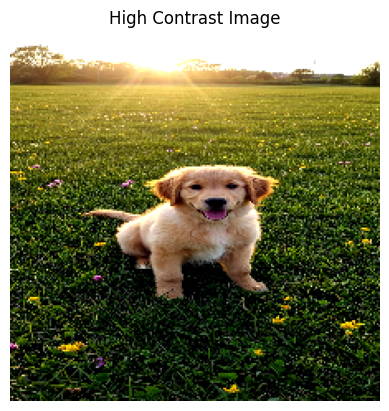

In [19]:

# 5. Random Contrast
contrast_layer = tf.keras.layers.RandomContrast(0.5)
contrast_img = contrast_layer(img_array)[0]
show_image(contrast_img, "High Contrast Image")

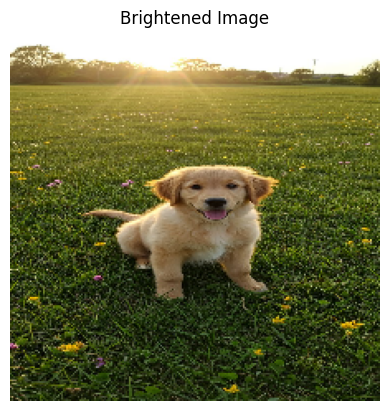

In [20]:
# 6. Random Brightness
bright_img = tf.image.random_brightness(img_array[0], max_delta=0.5)
show_image(bright_img, "Brightened Image")


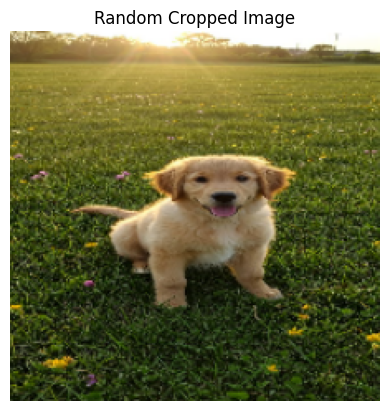

In [21]:
# 7. Random Crop (need to resize first)
resized_img = tf.image.resize(img_array[0], [256, 256])
cropped_img = tf.image.random_crop(resized_img, size=[224, 224, 3])
show_image(cropped_img, "Random Cropped Image")


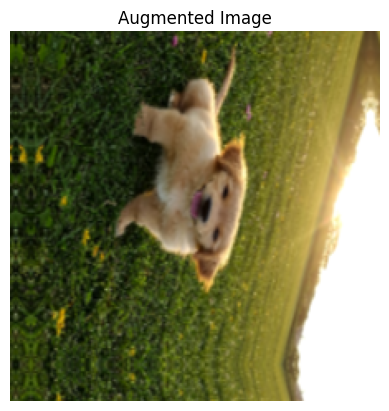

In [31]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Helper function to show image
def show_image(img, title="Image"):
    if isinstance(img, tf.Tensor):
        img = img.numpy()
    img = np.clip(img, 0, 1)  # Since we're normalizing
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Step 1: Load and preprocess image
img_path = '/content/dog.jpg'  # <-- Your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)  # Convert to array (224, 224, 3)
img_array = tf.expand_dims(img_array, 0)  # Shape becomes (1, 224, 224, 3)

# Step 2: Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.5),
    layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomContrast(0.3),
    layers.Rescaling(1./255)
])

# Step 3: Apply data augmentation
augmented_img = data_augmentation(img_array)[0]  # Remove batch dimension for display

# Step 4: Show the result
show_image(augmented_img, "Augmented Image")
